In [32]:
from pathlib import Path

import cartopy.crs as ccrs
import iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
basedir = Path('/gws/nopw/j04/mcs_prime/mmuetz/data/UM_sims/u-db150/init_test')

In [3]:
basedir.exists()

True

In [4]:
pd_paths = sorted(basedir.glob('*.pd*.pp'))

In [5]:
cubes = iris.load(pd_paths)

/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1563: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1598: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t2 = cftime.datetime(
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/cf_units/__init__.py:411: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  dates = np.array([dt and dt.replace(microsecond=0) for dt in dates])
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [6]:
cube = cubes.extract_cube('precipitation_flux')
da = xr.DataArray.from_iris(cube)

In [15]:
hour_12 = iris.Constraint(time=lambda cell: (cell.point.hour == 12) and (cell.point.minute == 0))
c2 = cube.extract(hour_12)

In [24]:
da = xr.DataArray.from_iris(c2)

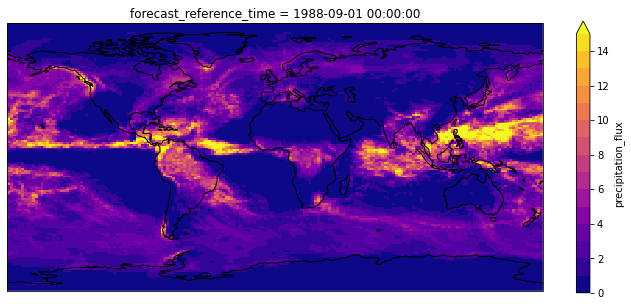

In [36]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((12, 5))
(da * 3600 * 24).mean(dim='dim_0').plot(ax=ax, cmap='plasma', levels=np.linspace(0, 15, 16))
ax.coastlines()
plt.savefig('mm_rain_comparison.png')

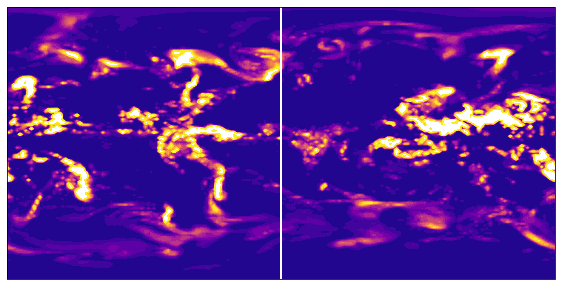

In [34]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((12, 5))
ax.contourf(da.longitude, da.latitude, da.values[0] * 3600 * 24, cmap='plasma', levels=np.linspace(0, 15, 16))